The data file Download data fileDownload wages_81_87.csvshows the average hourly wages for U.S. apparel and textile workers  for July 1981 to June 1987. 

(a) Plot the time series.  What pattern do you see from the plot?

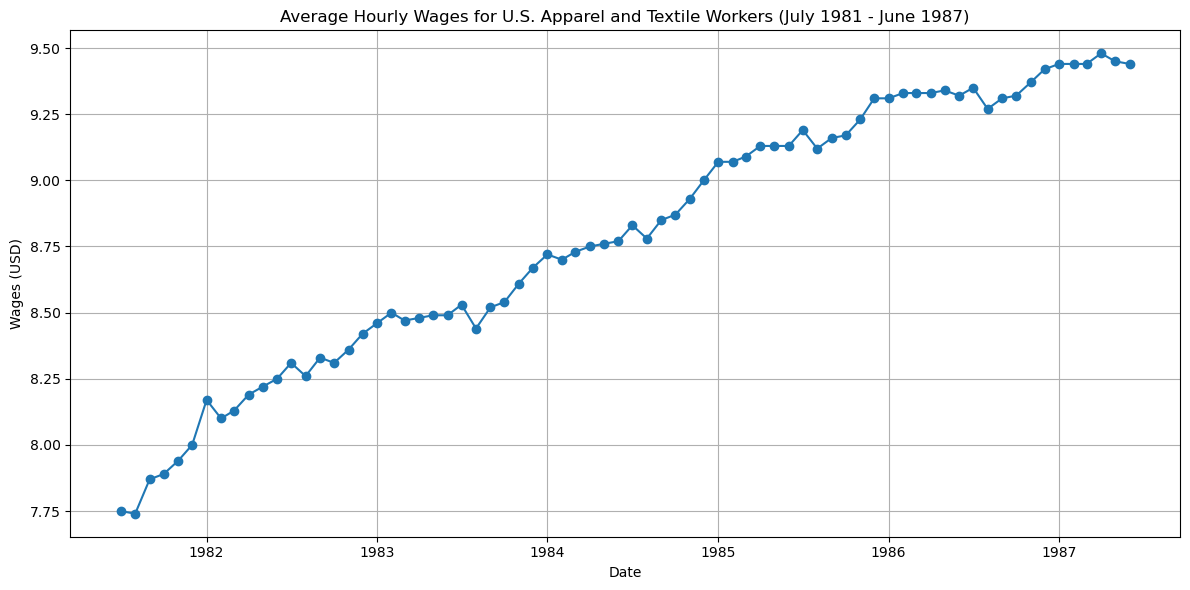

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'ass2_wages.csv'
wages_df = pd.read_csv(file_path)

wages_df['Date'] = pd.to_datetime(wages_df[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
plt.plot(wages_df['Date'], wages_df['Wages'], marker='o')
plt.title('Average Hourly Wages for U.S. Apparel and Textile Workers (July 1981 - June 1987)')
plt.xlabel('Date')
plt.ylabel('Wages (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

Intercept (β₀): 7.954859208523583
Slope (β₁): 0.023423371277895955


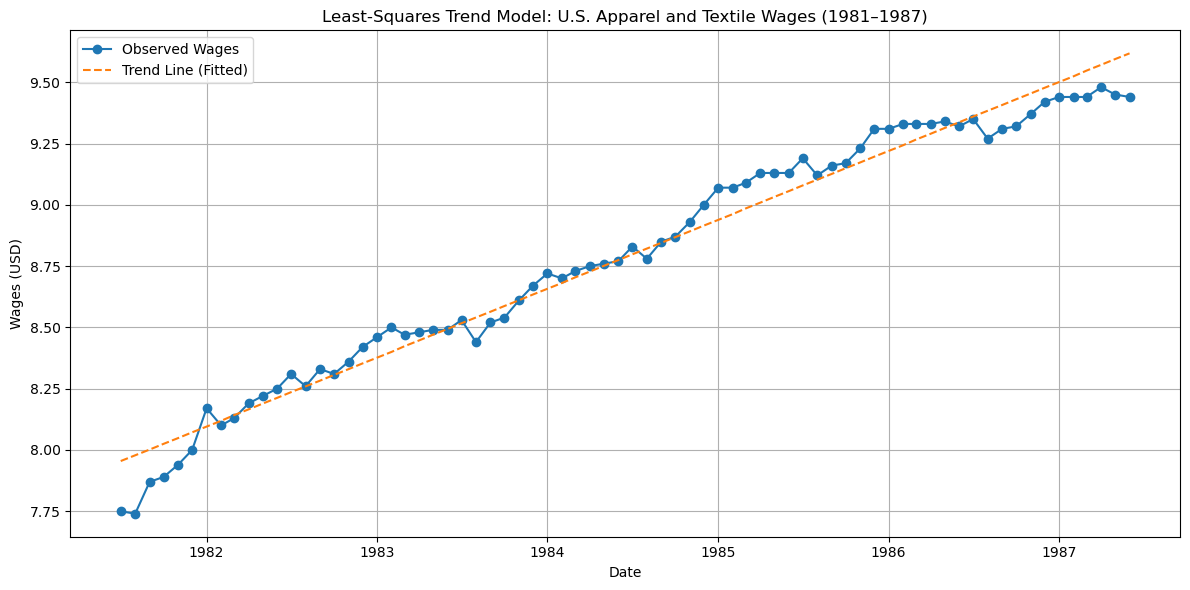

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'ass2_wages.csv'
wages_df = pd.read_csv(file_path)

# Create a time index and a date column
wages_df['Time'] = np.arange(len(wages_df))  # 0 to 71 for 72 months
wages_df['Date'] = pd.to_datetime(wages_df[['Year', 'Month']].assign(DAY=1))

# Construct the design matrix X (intercept and time)
X = np.column_stack((np.ones(len(wages_df)), wages_df['Time'].values.reshape(-1, 1)))  # (n x 2)

# Response variable y as a column vector
y = wages_df[['Wages']].values  # (n x 1)

# Perform least squares using matrix operations: β = (X'X)^(-1) X'y
XtX_inv = np.linalg.inv(X.T @ X)
XtY = X.T @ y
beta = XtX_inv @ XtY  # (2 x 1)

# Add predicted values (trend) to the DataFrame
wages_df['Trend'] = (X @ beta).flatten()

# Print the model coefficients
print("Intercept (β₀):", beta[0][0])
print("Slope (β₁):", beta[1][0])

# Plot original data and trend line
plt.figure(figsize=(12, 6))
plt.plot(wages_df['Date'], wages_df['Wages'], label='Observed Wages', marker='o')
plt.plot(wages_df['Date'], wages_df['Trend'], label='Trend Line (Fitted)', linestyle='--')
plt.title('Least-Squares Trend Model: U.S. Apparel and Textile Wages (1981–1987)')
plt.xlabel('Date')
plt.ylabel('Wages (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import numpy as np

# X: intercept + time
X = np.column_stack((np.ones(len(wages_df)), wages_df['Time'].values.reshape(-1, 1)))

# y: wages as column vector
y = wages_df[['Wages']].values

# Matrix operations: beta = (X^T X)^-1 X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)

[[7.95485921]
 [0.02342337]]


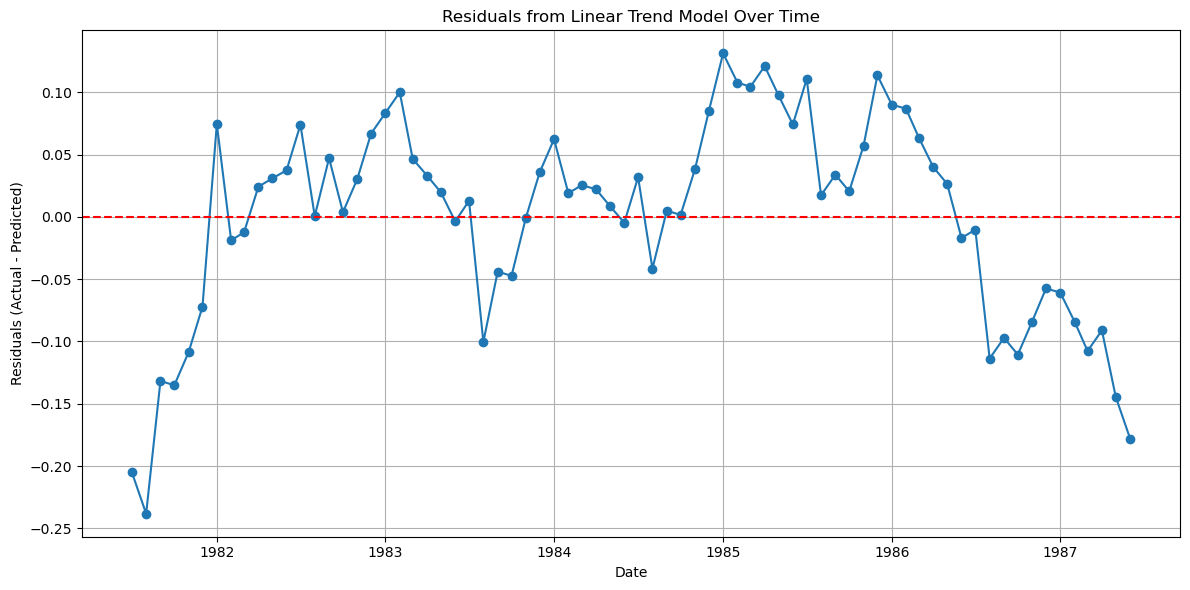

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'ass2_wages.csv'
wages_df = pd.read_csv(file_path)

wages_df['Time'] = np.arange(len(wages_df))
wages_df['Date'] = pd.to_datetime(wages_df[['Year', 'Month']].assign(DAY=1))

X = np.column_stack((np.ones(len(wages_df)), wages_df['Time'].values.reshape(-1, 1)))

y = wages_df[['Wages']].values

beta = np.linalg.inv(X.T @ X) @ X.T @ y

wages_df['Trend'] = (X @ beta).flatten()
wages_df['Residuals'] = wages_df['Wages'] - wages_df['Trend']

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(wages_df['Date'], wages_df['Residuals'], marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals from Linear Trend Model Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

Estimated Coefficients:
Intercept (β₀): 7.8316
Linear Term (β₁): 0.0340
Quadratic Term (β₂): -0.000149


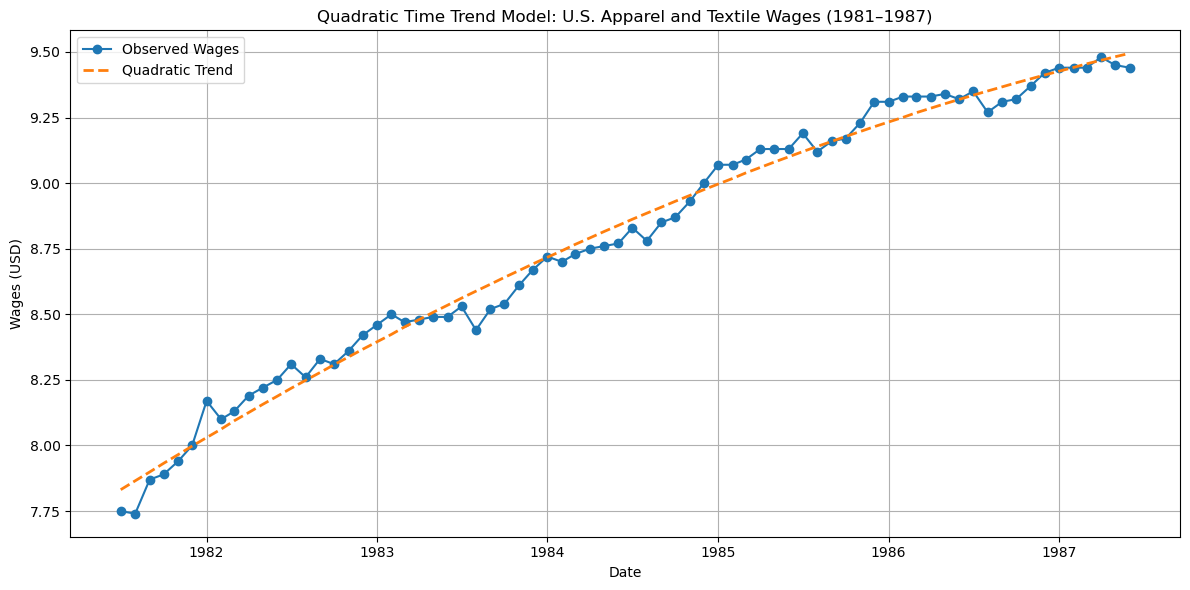

Estimated Regression Equation: Wages = 7.8316 + 0.0340 × Time + -0.000149 × Time²


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'ass2_wages.csv'
wages_df = pd.read_csv(file_path)

wages_df['Time'] = np.arange(len(wages_df))
wages_df['Date'] = pd.to_datetime(wages_df[['Year', 'Month']].assign(DAY=1))

# Construct the design matrix for quadratic trend: [1, Time, Time^2]
Time = wages_df['Time'].values.reshape(-1, 1)
X_quad = np.hstack([np.ones_like(Time), Time, Time**2])

y = wages_df[['Wages']].values

# Fit OLS: beta = (X'X)^(-1) X'y
beta_quad = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ y

b0, b1, b2 = beta_quad.flatten()
print("Estimated Coefficients:")
print(f"Intercept (β₀): {b0:.4f}")
print(f"Linear Term (β₁): {b1:.4f}")
print(f"Quadratic Term (β₂): {b2:.6f}")

wages_df['Quadratic_Trend'] = (X_quad @ beta_quad).flatten()

plt.figure(figsize=(12, 6))
plt.plot(wages_df['Date'], wages_df['Wages'], label='Observed Wages', marker='o')
plt.plot(wages_df['Date'], wages_df['Quadratic_Trend'], label='Quadratic Trend', linestyle='--', linewidth=2)
plt.title('Quadratic Time Trend Model: U.S. Apparel and Textile Wages (1981–1987)')
plt.xlabel('Date')
plt.ylabel('Wages (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

regression_eq = f"Estimated Regression Equation: Wages = {b0:.4f} + {b1:.4f} × Time + {b2:.6f} × Time²"
print(regression_eq)


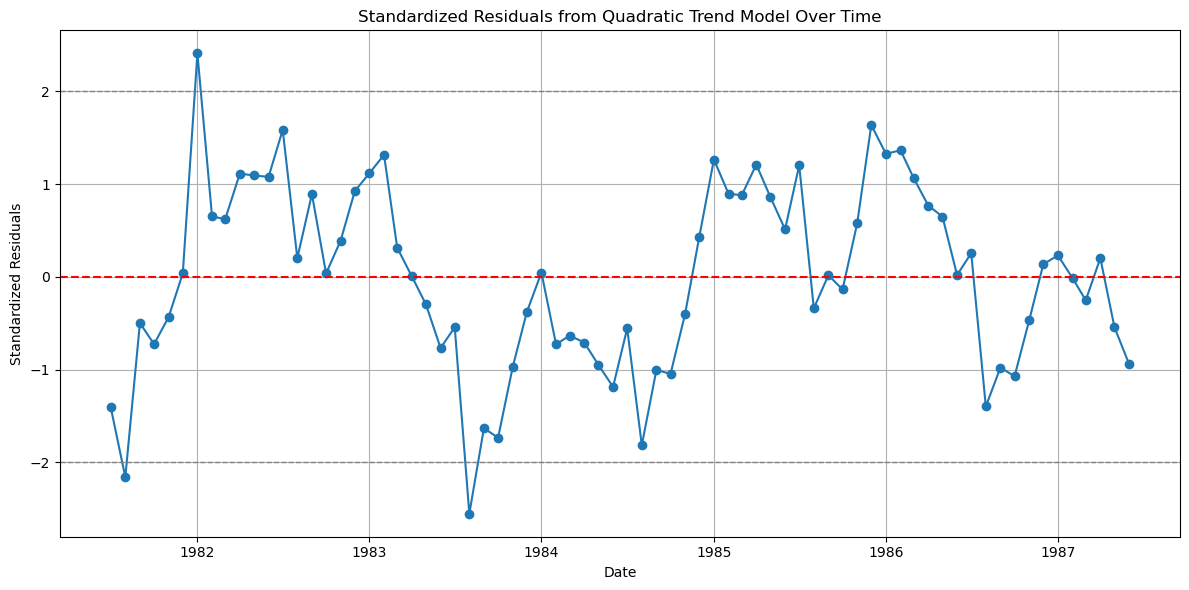

In [17]:
import matplotlib.pyplot as plt

# 1. Compute residuals from quadratic model
wages_df['Quad_Residuals'] = wages_df['Wages'] - wages_df['Quadratic_Trend']

# 2. Standardize the residuals: (residual - mean) / std
mean_resid = wages_df['Quad_Residuals'].mean()
std_resid = wages_df['Quad_Residuals'].std()
wages_df['Standardized_Residuals'] = (wages_df['Quad_Residuals'] - mean_resid) / std_resid

# 3. Plot standardized residuals over time
plt.figure(figsize=(12, 6))
plt.plot(wages_df['Date'], wages_df['Standardized_Residuals'], marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.axhline(2, color='gray', linestyle='--', linewidth=1)
plt.axhline(-2, color='gray', linestyle='--', linewidth=1)
plt.title('Standardized Residuals from Quadratic Trend Model Over Time')
plt.xlabel('Date')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

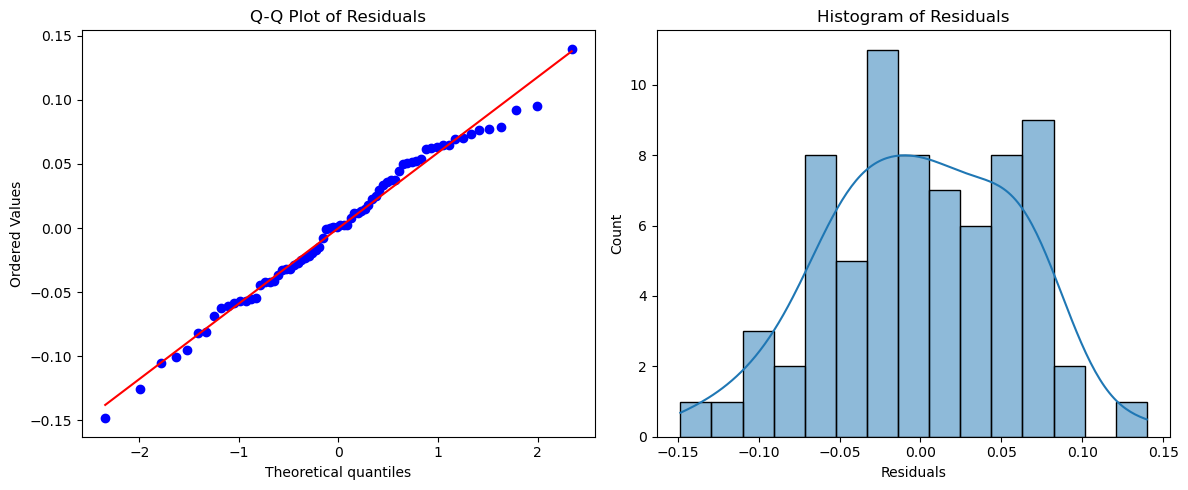

Shapiro-Wilk test statistic: 0.9886
Shapiro-Wilk test p-value: 0.7622


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

residuals = wages_df['Quad_Residuals']

plt.figure(figsize=(12, 5))

# Q-Q plot
plt.subplot(1, 2, 1)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

# Histogram with KDE (Kernel Density Estimation)
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=15)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()

shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
